<a href="https://colab.research.google.com/github/prad69/MLAssignments/blob/main/Bagging%26Boosting_Assignment_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment we are going to work with a house price prediction dataset and see how the different techniques we learned in this module like decision trees, bagged trees and boosted trees perform on this problem.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


In [48]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Dataset

In this exercise you'll work with a House Price Prediction Dataset. You will predict the house price based on house features like location, lot area, front area, street access etc.

Create a directory called datasets in your Google Drive and import the files train.csv in that directory. You can check more avout the data from data_description.txt file.

Load the data in pandas dataframe and inspect the shape and few rows of the data

In [49]:
house_price_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/train-BB.csv')
print(house_price_data.shape)
house_price_data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
house_price_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Create a train and test split (80% train - 20% test)

In [51]:
from sklearn.model_selection import train_test_split

X = house_price_data.drop(['Id','SalePrice'],axis=1)
y = house_price_data['SalePrice']



### Handle the NaN values
Observe multiple columns have a lot of NaN values. Let impute those missing values with zero. You can use more complex imputation techniques if you deem necessary.

In [52]:
X.fillna("0", inplace=True)


In [53]:
"""
X['LotFrontage']=X['LotFrontage'].fillna(X['LotFrontage'].median())
X['Alley']=X['Alley'].fillna(X['Alley'].mode()[0])
X['MasVnrType']=X['MasVnrType'].fillna(X['MasVnrType'].mode()[0])
X['MasVnrArea']=X['MasVnrArea'].fillna(X['MasVnrArea'].median())
X['BsmtQual']=X['BsmtQual'].fillna(X['BsmtQual'].mode()[0])
X['BsmtCond']=X['BsmtCond'].fillna(X['BsmtCond'].mode()[0])
X['BsmtExposure']=X['BsmtExposure'].fillna(X['BsmtExposure'].mode()[0])
X['BsmtFinType1']=X['BsmtFinType1'].fillna(X['BsmtFinType1'].mode()[0])
X['BsmtFinType2']=X['BsmtFinType2'].fillna(X['BsmtFinType2'].mode()[0])
X['Electrical']=X['Electrical'].fillna(X['Electrical'].mode()[0])
X['FireplaceQu']=X['FireplaceQu'].fillna(X['FireplaceQu'].mode()[0])
X['GarageType']=X['GarageType'].fillna(X['GarageType'].mode()[0])
X['GarageYrBlt']=X['GarageYrBlt'].fillna(X['GarageYrBlt'].mode()[0])
X['GarageFinish']=X['GarageFinish'].fillna(X['GarageFinish'].mode()[0])
X['GarageQual']=X['GarageQual'].fillna(X['GarageQual'].mode()[0])
X['GarageCond']=X['GarageCond'].fillna(X['GarageCond'].mode()[0])
X['PoolQC']=X['PoolQC'].fillna('NA')
X['Fence']=X['Fence'].fillna('NA')
X['MiscFeature']=X['MiscFeature'].fillna('NA')

cat_features = [
                'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']
"""

"\nX['LotFrontage']=X['LotFrontage'].fillna(X['LotFrontage'].median())\nX['Alley']=X['Alley'].fillna(X['Alley'].mode()[0])\nX['MasVnrType']=X['MasVnrType'].fillna(X['MasVnrType'].mode()[0])\nX['MasVnrArea']=X['MasVnrArea'].fillna(X['MasVnrArea'].median())\nX['BsmtQual']=X['BsmtQual'].fillna(X['BsmtQual'].mode()[0])\nX['BsmtCond']=X['BsmtCond'].fillna(X['BsmtCond'].mode()[0])\nX['BsmtExposure']=X['BsmtExposure'].fillna(X['BsmtExposure'].mode()[0])\nX['BsmtFinType1']=X['BsmtFinType1'].fillna(X['BsmtFinType1'].mode()[0])\nX['BsmtFinType2']=X['BsmtFinType2'].fillna(X['BsmtFinType2'].mode()[0])\nX['Electrical']=X['Electrical'].fillna(X['Electrical'].mode()[0])\nX['FireplaceQu']=X['FireplaceQu'].fillna(X['FireplaceQu'].mode()[0])\nX['GarageType']=X['GarageType'].fillna(X['GarageType'].mode()[0])\nX['GarageYrBlt']=X['GarageYrBlt'].fillna(X['GarageYrBlt'].mode()[0])\nX['GarageFinish']=X['GarageFinish'].fillna(X['GarageFinish'].mode()[0])\nX['GarageQual']=X['GarageQual'].fillna(X['GarageQual'].

### Process the string features using [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

There are multiple string/non-number fetures in the data. We use label encoding to convert them to numbers.

In [54]:
from sklearn.preprocessing import LabelEncoder


#X_train[cat_features] = X_train[cat_features].apply(LabelEncoder().fit_transform)
#X_test[cat_features] = X_test[cat_features].apply(LabelEncoder().fit_transform)

encoder = LabelEncoder()

for column in X.select_dtypes(exclude=["number"]).columns:
    encoder.fit_transform(X[column].to_list())

    X[column] = encoder.transform(X[column])

# Typecast all columsn to numeric float
X = X.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
921,90.0,3.0,78.0,8777.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,9.0,2008.0,8.0,4.0
520,190.0,3.0,71.0,10800.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2008.0,8.0,4.0
401,20.0,3.0,76.0,8767.0,1.0,0.0,0.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2006.0,6.0,5.0
280,60.0,3.0,93.0,11287.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2007.0,8.0,4.0
1401,60.0,3.0,73.0,7415.0,1.0,0.0,0.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2008.0,8.0,4.0


## Import necessary libraries

In [55]:
#Import necessary metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Import necessary model selection tools
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

#Import necessary models
#Simple decision tree
from sklearn.tree import DecisionTreeRegressor
# Simple bagged model
from sklearn.ensemble import BaggingRegressor
# Simple boosted model
from xgboost import XGBRegressor

## Train a Simple Decision Tree Rgeression Model

We will use DecisionTreeRegressor from scikit learn libarry. Explore the [API](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and model parameters before diving in.

### GridSearch some of the parameters like max_depth and max_features to find the best possible decison tree. We use GridSearchCV API for doing this.

In [56]:
# You can use this sample code or write your own code
model = DecisionTreeRegressor(random_state=1)
dt_parameters = {
  'max_depth':[2,4,8,12,16,24,32],
 'max_features':['auto','sqrt','log2']
 }
dt_search = GridSearchCV(model,dt_parameters,cv=5,scoring='r2')
dt_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [2, 4, 8, 12, 16, 24, 32],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='r2')

Print the following
1. best parameters
2. R2 score of the best model.
3. Mean squared error of the best model

In [57]:
# You can use this sample code or write your own code
best_model = dt_search.best_estimator_
best_params = dt_search.best_params_
prediction = best_model.predict(X_test)
print("best parameters:",best_params)
print("r2 score of best decision tree model: ",r2_score(prediction,y_test))
print("Mean squared error of best decision tree model: ",mean_squared_error(prediction,y_test))

best parameters: {'max_depth': 16, 'max_features': 'auto'}
r2 score of best decision tree model:  0.7283070315297756
Mean squared error of best decision tree model:  1470987413.9894953


### Fit multiple decision tree regressors on the house price data and plot the variance in accuracy of a simple decision tree. Use the best set of parameters found in grid search for this model.

Avg. error: 0.636 (0.077)


<ipython-input-58-059cebd758dd>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n_scores)


<Axes: ylabel='Density'>

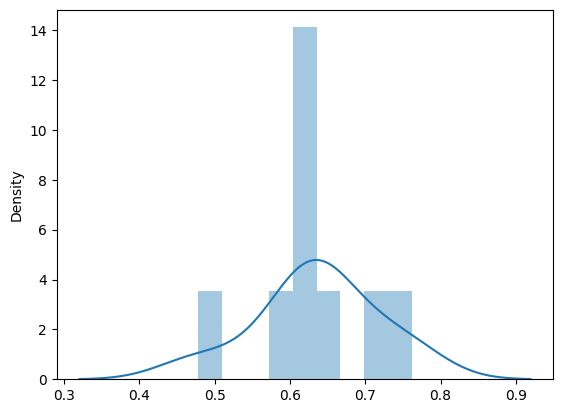

In [58]:
# You can use this sample code or write your own code
# # evaluate the model
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(best_model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
print('Avg. error: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
sns.distplot(n_scores)

## Train a Bagged Decison Tree Model

We will use BaggingRegressor from scikit learn libarry. Explore the [API](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html) and model parameters before diving in.

### GridSearch some of the parameters to find the best possible bagged regressor.

In [59]:
bagging_model = BaggingRegressor(random_state=1)
bagging_parameters = {
'n_estimators':[5,10,15,20,25,30,35,40,50],
'max_features':[0.5,0.75,1.0],
'max_samples':[0.2,0.4,0.6,0.8,1.0]}
bagging_search = GridSearchCV(bagging_model,bagging_parameters,cv=5,scoring='r2')
bagging_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(random_state=1),
             param_grid={'max_features': [0.5, 0.75, 1.0],
                         'max_samples': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 50]},
             scoring='r2')

Print the following
1. best parameters
2. R2 score of the best model.
3. Mean squared error of the best model

In [60]:
best_model = bagging_search.best_estimator_
best_params = bagging_search.best_params_
prediction = best_model.predict(X_test)
print("best parameters:",best_params)
print("r2 score of best model: ",r2_score(prediction,y_test))
print("Mean squared error of best model: ",mean_squared_error(prediction,y_test))

best parameters: {'max_features': 0.75, 'max_samples': 1.0, 'n_estimators': 50}
r2 score of best model:  0.8380104439003129
Mean squared error of best model:  812157090.6082165


### Fit multiple bagging regressors on the house price data and plot the variance in accuracy of a simple decision tree. Use the best set of parameters found in grid search for this model.

R2 score mean and Standard Deviation: 0.842 (0.035)


<ipython-input-61-3e257ad18e1d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n_scores)


<Axes: ylabel='Density'>

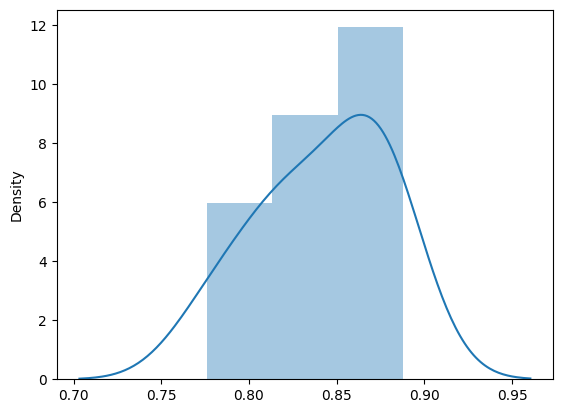

In [61]:
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(best_model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('R2 score mean and Standard Deviation: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
sns.distplot(n_scores)

 ### Compare the r2 score distribution graph with what we observed in decison trees.

Print the mean and standard deviation of decision tree and bagging model cv scores

In [62]:
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores_dt = cross_val_score(dt_search.best_estimator_, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
n_scores_bagging = cross_val_score(bagging_search.best_estimator_, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Decision Tree: R2 score mean and Standard Deviation: %.3f (%.3f)' % (np.mean(n_scores_dt), np.std(n_scores_dt)))
print('Bagging: R2 score mean and Standard Deviation: %.3f (%.3f)' % (np.mean(n_scores_bagging), np.std(n_scores_bagging)))

Decision Tree: R2 score mean and Standard Deviation: 0.636 (0.077)
Bagging: R2 score mean and Standard Deviation: 0.842 (0.035)


## Train Gradient Boosted Decision Tree

We will use XGBRegressor from XGBoost library Explore the [API](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn) and model parameters before diving in. In parctice this is the model you will use most practical use cases.

### GridSearch some of the parameters to find the best possible XGBoost Regressor.

In [63]:
# supercharge the grid search with gpu acceleration with tree_method="gpu_hist"
model = XGBRegressor()
xgb_parameters = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01,],
    "colsample_bytree": [0.1, 0.3]
}
xgbr_search = GridSearchCV(model, xgb_parameters, cv=5, scoring='r2')
xgbr_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.1, 0.3],
                         'learning_rate': [0.1, 0.01], 'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

Print the following
1. best parameters
2. R2 score of the best model.
3. Mean squared error of the best model

In [64]:
best_model = xgbr_search.best_estimator_
best_params = xgbr_search.best_params_
prediction = best_model.predict(X_test)
print("best parameters:",best_params)
print("r2 score of best model: ",r2_score(prediction,y_test))
print("Mean squared error of best model: ",mean_squared_error(prediction,y_test))

best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
r2 score of best model:  0.9201329982811426
Mean squared error of best model:  466357501.9087835


### Fit multiple bagging regressors on the house price data and plot the variance in accuracy of a simple decision tree. Use the best set of parameters found in grid search for this model.

In [65]:
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores_xgboost = cross_val_score(xgbr_search.best_estimator_, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
n_scores_bagging = cross_val_score(bagging_search.best_estimator_, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('XGBoost: R2 score mean and Standard Deviation: %.3f (%.3f)' % (np.mean(n_scores_xgboost), np.std(n_scores_xgboost)))
print('Bagging: R2 score mean and Standard Deviation: %.3f (%.3f)' % (np.mean(n_scores_bagging), np.std(n_scores_bagging)))

XGBoost: R2 score mean and Standard Deviation: 0.872 (0.041)
Bagging: R2 score mean and Standard Deviation: 0.842 (0.035)


 ### Compare the r2 score distribution graph with what we observed in bagged regressor. Note your observations.

Print the mean and standard deviation of xgboost and bagging model cv scores

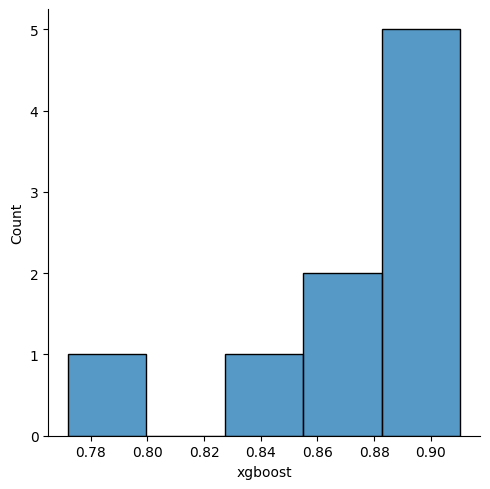

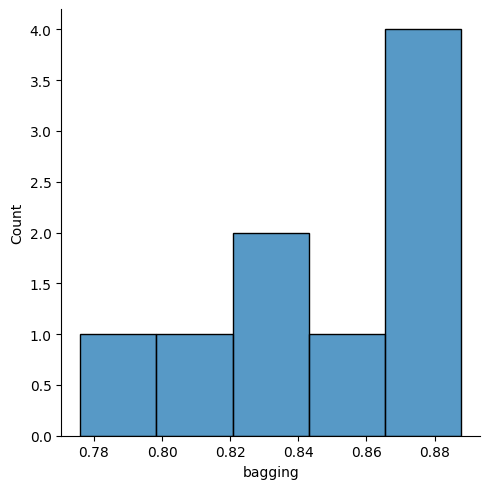

In [66]:
df = pd.DataFrame({'xgboost':n_scores_xgboost,'bagging':n_scores_bagging})
sns.displot(data=df,x='xgboost')
sns.displot(data=df,x='bagging')
plt.show()